<a href="https://colab.research.google.com/github/matheusmf1/ECM514_Data_Science/blob/master/twitterT3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter - NLP Analysis - Matheus Mandotti Franco RA: 16.00177-0

## Imports

In [1]:
import nltk
nltk.download('popular')
import pandas as pd
import numpy as np

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

## DataSet load

In [17]:
df = pd.read_csv( '/content/drive/My Drive/Colab Notebooks/Data Science Class/DataSets/NLP-twitter/Tweets_PT-BR.csv')
df.head()

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,Observação,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.columns

Index(['Unnamed: 0', 'Created At', 'Text', 'Geo Coordinates.latitude',
       'Geo Coordinates.longitude', 'User Location', 'Username',
       'User Screen Name', 'Retweet Count', 'Classificacao', 'Observação',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [4]:
df.isnull().sum()

Unnamed: 0                      0
Created At                      0
Text                            0
Geo Coordinates.latitude     8095
Geo Coordinates.longitude    8095
User Location                2710
Username                        0
User Screen Name                0
Retweet Count                   0
Classificacao                   0
Observação                   8198
Unnamed: 10                  8199
Unnamed: 11                  8199
Unnamed: 12                  8199
Unnamed: 13                  8199
Unnamed: 14                  8199
Unnamed: 15                  8199
Unnamed: 16                  8199
Unnamed: 17                  8199
Unnamed: 18                  8199
Unnamed: 19                  8199
Unnamed: 20                  8199
Unnamed: 21                  8199
Unnamed: 22                  8199
Unnamed: 23                  8199
Unnamed: 24                  8199
dtype: int64

## Ajuste nos dados e Seleção das colunas

In [19]:
df.rename( columns = {'Text': 'Texto'}, inplace=True)

In [20]:
df.drop(labels = [ 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24' ], axis = 1, inplace = True )

In [21]:
df['Observação'].unique()

array([nan,
       'Apesar do texto estar confuso, dá para entender que é uma crítica'],
      dtype=object)

In [57]:
df2 = df[ ['Texto', 'Classificacao'] ]
df2.head()

,Texto,Classificacao
0,���⛪ @ Catedral de Santo Antônio - Governador ...,Neutro
1,"� @ Governador Valadares, Minas Gerais https:/...",Neutro
2,"�� @ Governador Valadares, Minas Gerais https:...",Neutro
3,��� https://t.co/BnDsO34qK0,Neutro
4,��� PSOL vai questionar aumento de vereadores ...,Negativo


In [23]:
df2.isnull().sum()

Texto            0
Classificacao    0
dtype: int64

In [28]:
df2['Classificacao'].unique()

array(['Neutro', 'Negativo', 'Positivo'], dtype=object)

## Pré Processamento

### Mapeando os sentimentos

In [58]:
df2['Classificacao'] = df2['Classificacao'].map( { 'Negativo' : -1, 'Neutro' : 0, 'Positivo' : 1 } )
df2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Texto,Classificacao
0,���⛪ @ Catedral de Santo Antônio - Governador ...,0
1,"� @ Governador Valadares, Minas Gerais https:/...",0
2,"�� @ Governador Valadares, Minas Gerais https:...",0
3,��� https://t.co/BnDsO34qK0,0
4,��� PSOL vai questionar aumento de vereadores ...,-1


### Passando para minúsculo

In [59]:
df2['Texto'] = df2['Texto'].apply( str.lower )
df2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Texto,Classificacao
0,���⛪ @ catedral de santo antônio - governador ...,0
1,"� @ governador valadares, minas gerais https:/...",0
2,"�� @ governador valadares, minas gerais https:...",0
3,��� https://t.co/bndso34qk0,0
4,��� psol vai questionar aumento de vereadores ...,-1


### Tokenização e normalização do texto

In [60]:
# Funções auxiliares para normalização de texto
import re
import unicodedata
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
def remove_acento( frase_tokenizada ):
    frase = []
    for palavra in frase_tokenizada:
        palavra = palavra.replace('á','a')
        palavra = palavra.replace('é','e')
        palavra = palavra.replace('í','i')
        palavra = palavra.replace('ó','o')
        palavra = palavra.replace('ú','u')
        palavra = palavra.replace('ã','a')
        palavra = palavra.replace('õ','o')
        palavra = palavra.replace('ç','c')
        palavra = palavra.replace('â','a')
        palavra = palavra.replace('ê','e')
        palavra = palavra.replace('î','i')
        palavra = palavra.replace('ô','o')
        palavra = palavra.replace('û','u')
        palavra = palavra.replace('à','a')
        palavra = palavra.replace('è','e')
        palavra = palavra.replace('ì','i')
        palavra = palavra.replace('ò','o')
        palavra = palavra.replace('ù','u')
        palavra = palavra.replace('ü','u')
        frase.append( palavra )
    return frase

def removerAcentosECaracteresEspeciais(palavra):
        # Unicode normalize transforma um caracter em seu equivalente em latin.
        nfkd = unicodedata.normalize('NFKD', palavra)
        palavraSemAcento = u"".join([c for c in nfkd if not unicodedata.combining(c)])
        # Usa expressão regular para retornar a palavra apenas com números, letras e espaço
        return re.sub('[^a-zA-Z0-9 \\\]', '', palavraSemAcento)

def no_alphas( frase_tokenizada ):
        return [palavra for palavra in frase_tokenizada if (palavra.isalpha())]

#### Remove emoji

In [61]:
df2['Texto'] = df2['Texto'].apply( remove_emoji )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Remove Acentos e Carracteres Especiais

In [62]:
df2['Texto'] = df2['Texto'].apply( removerAcentosECaracteresEspeciais )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Word Tokenize

In [63]:
from nltk.tokenize import word_tokenize

df2['Texto'] = df2['Texto'].apply( word_tokenize )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Remove alphas

In [64]:
df2['Texto'] = df2['Texto'].apply( no_alphas )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
df2.head()

,Texto,Classificacao
0,"[catedral, de, santo, antonio, governador, val...",0
1,"[governador, valadares, minas, gerais]",0
2,"[governador, valadares, minas, gerais]",0
3,[],0
4,"[psol, vai, questionar, aumento, de, vereadore...",-1


## Stop Words

In [66]:
from nltk.corpus import stopwords
from string import punctuation

stw = stopwords.words( 'portuguese' )
punc = list(punctuation)

spwd_pt = set( stw + punc )

print( spwd_pt )

{']', 'esses', 'como', 'estivessem', 'teu', 'fui', 'temos', 'delas', 'o', '+', 'houverem', 'da', 'mais', 'nossos', 'estávamos', 'houveria', 'mas', 'isto', 'houvemos', 'tiver', 'qual', 'houvera', 'tivesse', '"', 'houveram', 'ele', 'está', 'havemos', 'já', 'estiveram', 'seremos', '%', 'estiver', 'haja', 'quem', 'tinham', 'sem', 'hei', 'teve', 'houveriam', 'estivéramos', 'houvermos', 'terá', 'aos', 'fosse', 'mesmo', 'lhes', 'seríamos', 'pela', 'uma', 'pelas', 'deles', 'vos', 'estivesse', 'foram', '<', 'ao', 'nossa', 'esteja', '*', '>', "'", 'hão', 'se', 'nosso', 'aquela', '|', 'do', ',', 'teremos', 'serei', 'dele', 'fomos', 'fôssemos', '}', 'estas', 'das', 'estivemos', '.', 'meus', 'esta', 'aquele', 'sou', 'aqueles', 'tua', 'nós', 'elas', 'teríamos', '=', 'só', 'dela', 'por', 'tivéramos', 'seus', '-', '?', 'os', ')', 'eram', 'minhas', 'estou', 'esteve', 'tu', 'isso', 'de', 'fora', 'tiverem', 'tivermos', '&', 'num', 'nos', 'minha', 'hajam', 'tuas', '#', 'houve', '!', '\\', 'suas', 'serão',

In [67]:
def remove_stops(frase_tokenizada, stopwords_pt):
  w_token_1_sem_stopwords = [palavra for palavra in frase_tokenizada if palavra not in stopwords_pt]
  return w_token_1_sem_stopwords


df2['Texto'].apply( remove_stops, stopwords_pt = spwd_pt )
df2.head()

,Texto,Classificacao
0,"[catedral, de, santo, antonio, governador, val...",0
1,"[governador, valadares, minas, gerais]",0
2,"[governador, valadares, minas, gerais]",0
3,[],0
4,"[psol, vai, questionar, aumento, de, vereadore...",-1


## Stemming

In [68]:
def stemming_pt( frase_tokenizada, stemmer ):
  frase = []
  for palavra in frase_tokenizada:
    frase.append( stemmer.stem(palavra) )
  return frase

In [71]:
import nltk
nltk.download('rslp')
from nltk.stem import RSLPStemmer

stem_local = RSLPStemmer()

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [70]:
df2['Texto'] = df2['Texto'].apply( stemming_pt, stemmer = stem_local )
df2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Texto,Classificacao
0,"[catedr, de, sant, antoni, govern, valadaresmg...",0
1,"[govern, valad, min, geral]",0
2,"[govern, valad, min, geral]",0
3,[],0
4,"[psol, vai, quest, aument, de, vere, e, prefei...",-1


In [72]:
def reconstroi_frase( frase_tokenizada ):
  return ' '.join( frase_tokenizada )

df2['processado_pt'] = df2['Texto'].apply( reconstroi_frase )
df2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Texto,Classificacao,processado_pt
0,"[catedr, de, sant, antoni, govern, valadaresmg...",0,catedr de sant antoni govern valadaresmg https...
1,"[govern, valad, min, geral]",0,govern valad min geral
2,"[govern, valad, min, geral]",0,govern valad min geral
3,[],0,
4,"[psol, vai, quest, aument, de, vere, e, prefei...",-1,psol vai quest aument de vere e prefeit de bh ...


## Testes

In [73]:
texto_teste = ['Perder faz parte do esporte, tentamos de tudo, lutamos até o final. Obrigado pelo apoio e carinho de cada um de vocês 🙏🏽 e PARABÉNS ao BAYER 👏🏽',
               'Ai ai ai ai, tá chegando a hora...',
               'Que Deus nos abençoe e nos proteja 🙏🏽⚽️ #ChampionsLeague',
               '- Há pelo menos 10 anos o sistema Globo me persegue e nada conseguiram provar contra mim. - Agora aguardo explicações da família Marinho sobre a delação do "doleiro dos doleiros", onde valores superiores a R$ 1 bilhão teriam sido repassados a eles.',
               '- Em julho 2020 o CAGED apresentou um saldo positivo de 131.010 novos postos de trabalho. - O grande destaque foi a indústria de transformação, em especial a fabricação de produtos alimentícios e a construção civil. - É o Brasil voltando à normalidade. @govbr @planalto',
               '- Inauguração da Estação Radar de Corumbá (MS). Reforço no controle de tráfego na fronteira do Brasil com o Paraguai e Bolívia. Avanço no monitoramento e ações de combate ao tráfico e demais problemas em mais esta região de fronteira. @DefesaGovBr @fab_oficial @exercitooficial',
               'Clubes de assinatura ganham mais adeptos durante a quarentena',
               'Governo Bolsonaro desmonta ação de combate ao abuso de crianças',
               'O presidente Jair Bolsonaro afirmou neste domingo (23) ter vontade de agredir um repórter do jornal O Globo após ser questionado sobre os depósitos feitos pelo ex-policial militar Fabrício Queiroz na conta da primeira-dama Michelle Bolsonaro.']

In [74]:
texto_teste = [ each_string.lower() for each_string in texto_teste ]
texto_teste

['perder faz parte do esporte, tentamos de tudo, lutamos até o final. obrigado pelo apoio e carinho de cada um de vocês 🙏🏽 e parabéns ao bayer 👏🏽',
 'ai ai ai ai, tá chegando a hora...',
 'que deus nos abençoe e nos proteja 🙏🏽⚽️ #championsleague',
 '- há pelo menos 10 anos o sistema globo me persegue e nada conseguiram provar contra mim. - agora aguardo explicações da família marinho sobre a delação do "doleiro dos doleiros", onde valores superiores a r$ 1 bilhão teriam sido repassados a eles.',
 '- em julho 2020 o caged apresentou um saldo positivo de 131.010 novos postos de trabalho. - o grande destaque foi a indústria de transformação, em especial a fabricação de produtos alimentícios e a construção civil. - é o brasil voltando à normalidade. @govbr @planalto',
 '- inauguração da estação radar de corumbá (ms). reforço no controle de tráfego na fronteira do brasil com o paraguai e bolívia. avanço no monitoramento e ações de combate ao tráfico e demais problemas em mais esta região de

### Tokenização

In [75]:
texto_teste = [ remove_emoji(each_string) for each_string in texto_teste ]
texto_teste

['perder faz parte do esporte, tentamos de tudo, lutamos até o final. obrigado pelo apoio e carinho de cada um de vocês  e parabéns ao bayer ',
 'ai ai ai ai, tá chegando a hora...',
 'que deus nos abençoe e nos proteja  #championsleague',
 '- há pelo menos 10 anos o sistema globo me persegue e nada conseguiram provar contra mim. - agora aguardo explicações da família marinho sobre a delação do "doleiro dos doleiros", onde valores superiores a r$ 1 bilhão teriam sido repassados a eles.',
 '- em julho 2020 o caged apresentou um saldo positivo de 131.010 novos postos de trabalho. - o grande destaque foi a indústria de transformação, em especial a fabricação de produtos alimentícios e a construção civil. - é o brasil voltando à normalidade. @govbr @planalto',
 '- inauguração da estação radar de corumbá (ms). reforço no controle de tráfego na fronteira do brasil com o paraguai e bolívia. avanço no monitoramento e ações de combate ao tráfico e demais problemas em mais esta região de frontei

In [76]:
from nltk.tokenize import word_tokenize

texto_teste = [ removerAcentosECaracteresEspeciais(each_string) for each_string in texto_teste ]
texto_teste = [ word_tokenize(each_string) for each_string in texto_teste ]
texto_teste

[['perder',
  'faz',
  'parte',
  'do',
  'esporte',
  'tentamos',
  'de',
  'tudo',
  'lutamos',
  'ate',
  'o',
  'final',
  'obrigado',
  'pelo',
  'apoio',
  'e',
  'carinho',
  'de',
  'cada',
  'um',
  'de',
  'voces',
  'e',
  'parabens',
  'ao',
  'bayer'],
 ['ai', 'ai', 'ai', 'ai', 'ta', 'chegando', 'a', 'hora'],
 ['que', 'deus', 'nos', 'abencoe', 'e', 'nos', 'proteja', 'championsleague'],
 ['ha',
  'pelo',
  'menos',
  '10',
  'anos',
  'o',
  'sistema',
  'globo',
  'me',
  'persegue',
  'e',
  'nada',
  'conseguiram',
  'provar',
  'contra',
  'mim',
  'agora',
  'aguardo',
  'explicacoes',
  'da',
  'familia',
  'marinho',
  'sobre',
  'a',
  'delacao',
  'do',
  'doleiro',
  'dos',
  'doleiros',
  'onde',
  'valores',
  'superiores',
  'a',
  'r',
  '1',
  'bilhao',
  'teriam',
  'sido',
  'repassados',
  'a',
  'eles'],
 ['em',
  'julho',
  '2020',
  'o',
  'caged',
  'apresentou',
  'um',
  'saldo',
  'positivo',
  'de',
  '131010',
  'novos',
  'postos',
  'de',
  'tra

In [ ]:
texto_teste = [ no_alphas(each_string) for each_string in texto_teste ]

## Stop Words

In [78]:
texto_teste = [ remove_stops(each_string, spwd_pt) for each_string in texto_teste]
texto_teste

[['perder',
  'faz',
  'parte',
  'esporte',
  'tentamos',
  'tudo',
  'lutamos',
  'ate',
  'final',
  'obrigado',
  'apoio',
  'carinho',
  'cada',
  'voces',
  'parabens',
  'bayer'],
 ['ai', 'ai', 'ai', 'ai', 'ta', 'chegando', 'hora'],
 ['deus', 'abencoe', 'proteja', 'championsleague'],
 ['ha',
  'menos',
  'anos',
  'sistema',
  'globo',
  'persegue',
  'nada',
  'conseguiram',
  'provar',
  'contra',
  'mim',
  'agora',
  'aguardo',
  'explicacoes',
  'familia',
  'marinho',
  'sobre',
  'delacao',
  'doleiro',
  'doleiros',
  'onde',
  'valores',
  'superiores',
  'r',
  'bilhao',
  'sido',
  'repassados'],
 ['julho',
  'caged',
  'apresentou',
  'saldo',
  'positivo',
  'novos',
  'postos',
  'trabalho',
  'grande',
  'destaque',
  'industria',
  'transformacao',
  'especial',
  'fabricacao',
  'produtos',
  'alimenticios',
  'construcao',
  'civil',
  'brasil',
  'voltando',
  'normalidade',
  'govbr',
  'planalto'],
 ['inauguracao',
  'estacao',
  'radar',
  'corumba',
  'ms'

## Stemming

In [ ]:
texto_teste = [ stemming_pt( each_string, stem_local ) for each_string in texto_teste ]

In [80]:
texto_teste = [ reconstroi_frase(each_string) for each_string in texto_teste ]
texto_teste

['perd faz part esport tent tud lut ate final obrig apoi car cad voc parab bay',
 'ai ai ai ai ta cheg hor',
 'deu abenco protej championsleag',
 'ha menos ano sistem glob perseg nad consegu prov contr mim agor aguard explicaco famil mar sobr delaca dol dol ond val superi r bilha sid repass',
 'julh caged apresent sald posi nov post trabalh grand destaqu industr transformaca espec fabricaca produt alimentici construca civil brasil volt normal govbr planalt',
 'inauguraca estaca rad corumb ms reforc control trafeg fronteir brasil paragu boliv avanc monitor aco combat traf demal problem regia fronteir defesagovbr fabofic exercitoofic',
 'club assinat ganh adept dur quarenten',
 'govern bolsonar desmont aca combat abus crianc',
 'presid jair bolsonar afirm nest doming ter vontad agred report jorn glob apo ser question sobr deposit feit expolic milit fabrici queiroz cont primeiradam michell bolsonar']

## Modelo e BoW

In [81]:
x = df2['processado_pt'].values
y = df2['Classificacao'].values
x

array(['catedr de sant antoni govern valadaresmg httpstcojsbkamiquj',
       'govern valad min geral', 'govern valad min geral', ...,
       'tri e pres suspeit de roub traf e abus sex em uberland httpstcozaqbxrrjwc',
       'tri e pres suspeit de roub traf e abus sex em uberland um do autor ter molest vit de',
       'tri suspeit de roub de carg e pres em sant luz mg recordtvmin'],
      dtype=object)

In [82]:
from sklearn.model_selection import train_test_split
 
x_treino, x_test, y_treino, y_test  = train_test_split(x, y, test_size = 0.25 )

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer( analyzer = 'word', min_df = 0.01, max_df = 0.8 )
vect.fit(x_treino)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.8, max_features=None, min_df=0.01,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [84]:
bow_x_treino = vect.transform( x_treino )
bow_x_test = vect.transform( x_test )

### Classificador

In [85]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

### Classificação do modelo de teste

In [86]:
model.fit( bow_x_treino, y_treino )

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [87]:
bow_texto_teste = vect.transform( texto_teste )

In [89]:
output_test = model.predict( bow_texto_teste )

dict_resp = { -1: 'Negativo', 0: 'Neutro', 1: 'Positivo' }

for i in output_test:
  print( dict_resp[i] )

Negativo
Positivo
Positivo
Neutro
Positivo
Positivo
Positivo
Negativo
Neutro


## Validação do modelo

### Acurácia

In [90]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

print( model.score(bow_x_treino, y_treino) )
print( model.score(bow_x_test, y_test) )

0.8708733127337779
0.8697560975609756


### Treino

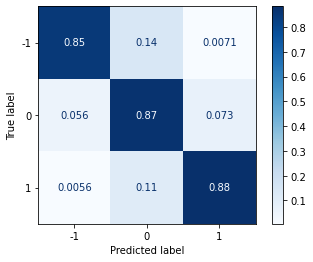

In [91]:
plot_confusion_matrix( estimator = model, X = bow_x_treino, y_true = y_treino, normalize = 'true', cmap = plt.cm.Blues )

### Teste

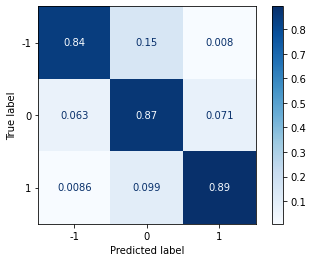

In [92]:
plot_confusion_matrix( estimator = model, X = bow_x_test, y_true = y_test, normalize = 'true', cmap = plt.cm.Blues )